<img src="https://report-images.nyc3.digitaloceanspaces.com/2016/03/13185531/AdoptABeachSC-Logo.png" alt="Adopt-A-Beach South Carolina logo" width="400"/>

## About Adopt-A-Beach
For this analysis I will be working with data from the South Carolina Department of Environmental Control (SCDHEC) [Adopt-A-Beach](https://mycoast.org/sc/beach-cleanup) program:
>The Adopt-A-Beach program is part of the DHEC Marine Debris Initiative and is a great way for businesses, civic clubs, school groups, and neighborhood associations to make a significant contribution to the preservation of the South Carolina coast. Marine debris, which can be defined as any solid, man-made product or material that ends up in our coastal environments, threatens wildlife, economies, and human health and safety. Adopt-A-Beach partners participate in beach cleanups, remove debris from our beaches and coastal waterways, and provide marine debris collection data to DHEC.

Adopt-A-Beach is part of [MyCoast: South Carolina](https://mycoast.org/sc): an online portal for SCDHEC to collect and analyze pictures and data relating to South Carolina's coast. According to the MyCoast South Carolina website, SCDHEC uses this information "*...to visualize the impact of coastal hazards and to enhance awareness among decision-makers and stakeholders.*"

## About the data 
Data is collected by volunteer participants who log marine debris/trash picked up during beach cleanups using the MyCoast app. The reports are available for viewing and downloading [here](https://mycoast.org/beach-cleanup/reportlist?stateLong=South+Carolina). Each observation in the dataset represents a beach cleanup that occured using the MyCoast app from April 2016 to present (October 7, 2021).
Data collected through the Adopt-A-Beach program provides valuable insight into the state of South Carolina's beaches. This data can be used for strategic planning and to drive policy changes in South Carolina to help protect the state's beaches, which are an important natural resource for residents and wildlife, as well as a crucial part of South Carolina's tourism economy.

## About the analysis
The goal of this analysis is to identify trends in partipication in Adopt-A-Beach to find new growth opportunities for the program.

### Questions for the analysis
1. What are some of the overall trends in the partipication in the Adopt-A-Beach cleanup program?
1. How can we leverage these trends to attract new participants to the program?
1. How can we retain participants and help them stay engaged in the program?
1. What are the limitations of the program/app/data? How can we make the data more valuable to SCDHEC and the public?

## Data Preparation
Let's start by loading the necessary packages, importing the data, and combining it into one dataset.

In [1]:
# creating custom ggplot theme
theme_dc <- function(){ 
  font <- "Roboto"   #assign font family up front
  
  theme_minimal() %+replace%    #replace elements we want to change
    
    theme(
      
      #grid elements
      panel.grid.major = element_blank(),    #strip major gridlines
      panel.grid.minor = element_blank(),    #strip minor gridlines
      axis.ticks = element_blank(),          #strip axis ticks
      
      #since theme_minimal() already strips axis lines, 
      #we don't need to do that again
      axis.line = element_line(color = '#d3d3d3'),
      
      #text elements
      plot.title = element_text(             #title
        family = 'serif',            #set font family
        size = 20,                #set font size
        face = 'bold',            #bold typeface
        color = '#595959',        #change color
        hjust = 0,                #left align
        vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
        family = font,            #font family
        size = 14,                #font size
        color = '#595959',        #change color
        hjust = 0),               #left align
      
      plot.caption = element_text(           #caption
        family = font,            #font family
        size = 9,                 #font size
        hjust = 1),               #right align
      
      axis.title = element_text(             #axis titles
        family = font,            #font family
        size = 18,                #font size
        color = '#595959',        #font color
        hjust = 1),               #alignment
        
      axis.text = element_text(              #axis text
        family = font,            #axis family
        size = 18,                #font size
        color = '#595959'),       #font color
      
      axis.text.x = element_text(            #margin for axis text
        margin = margin(5, b = 10),
        size = 18)
    )
}

In [2]:
# load libraries
library(tidyverse)
library(lubridate)
library(janitor)
library(modeest)
library(scales)

# import data
cleanups2016 <- read_csv('../input/sc-beach-cleanups/2016_BeachCleanups.csv')
cleanups2017 <- read_csv('../input/sc-beach-cleanups/2017_BeachCleanups.csv')
cleanups2018 <- read_csv('../input/sc-beach-cleanups/2018_BeachCleanups.csv')
cleanups2019 <- read_csv('../input/sc-beach-cleanups/2019_BeachCleanups.csv')
cleanups2020 <- read_csv('../input/sc-beach-cleanups/2020_BeachCleanups.csv')
cleanups2021 <- read_csv('../input/sc-beach-cleanups/2021_BeachCleanups.csv')

#combine data
beachCleanups <- bind_rows(
  cleanups2016, 
  cleanups2017, 
  cleanups2018, 
  cleanups2019,
  cleanups2020,
  cleanups2021,
)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Rows: 44 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimi

## Cleaning the data

In [3]:
head(beachCleanups)

Date,Details,Beach Name/Location,Organization,Items,Volunteer Hours,Weight
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
12/30/2016,Recap,Surfside Beach,Individual (1298),7,0.75,0.16
12/29/2016,Recap,Surfside Beach,Individual (1298),6,0.75,0.26
12/11/2016,Recap,Sullivans Island,1665,64,5.00,3.97
12/08/2016,Recap,Sullivans Island,1549,327,21.00,17.59
11/26/2016,Recap,Sullivans Island,1665,73,7.00,3.20
11/13/2016,Recap,Hilton Head Island,1860,250,0.75,17.11


A quick look with the `head()` function shows there's some cleaning to do:
- There is an irrelevant "Details" column that needs removing (the data was pulled from a webpage table and the Details column linked to another page with further info on each cleanup - this data is not included here)
- The column names need to be converted to snake_case formatting
- The date column is currently is currently a character vector `chr` and needs to be converted to date-time `dttm` format

In [4]:
#remove 'Details' column
#snake_case column names
#convert date column to YYYYMMDD format

beachCleanups <- beachCleanups %>% 
  select(-Details) %>% #remove 'details' column
  clean_names() %>% #snake_case column names
  mutate(date = (mdy(date))) #convert date column to YYYYMMDD format

Let's take a second look at the `organization` column before I begin the analysis. Prior to uploading the data I anonymized the `organization` column for participant privacy, so names have been converted to four-digit numbers. There are two types of entries: those that include the word "Individual" followed by a number in parenthesis and those that just have a number. These two types of entries indicate whether the participant completed the cleanup as an individual or a group. Since this gives me a bit more information about how volunteers choose to partipate and can perhaps offer some insight into trends, I will create a new column for this variable and call it `type`.

In [5]:
beachCleanups <- beachCleanups %>%
  mutate(type = case_when(
    str_detect(organization, 'Individual') ~ 'individual',
    str_detect(organization, 'Individual', negate = TRUE) ~ 'group'))

# Analysis

## Participants
First, I'm going to look at some general trends in the number of program participants over the years.

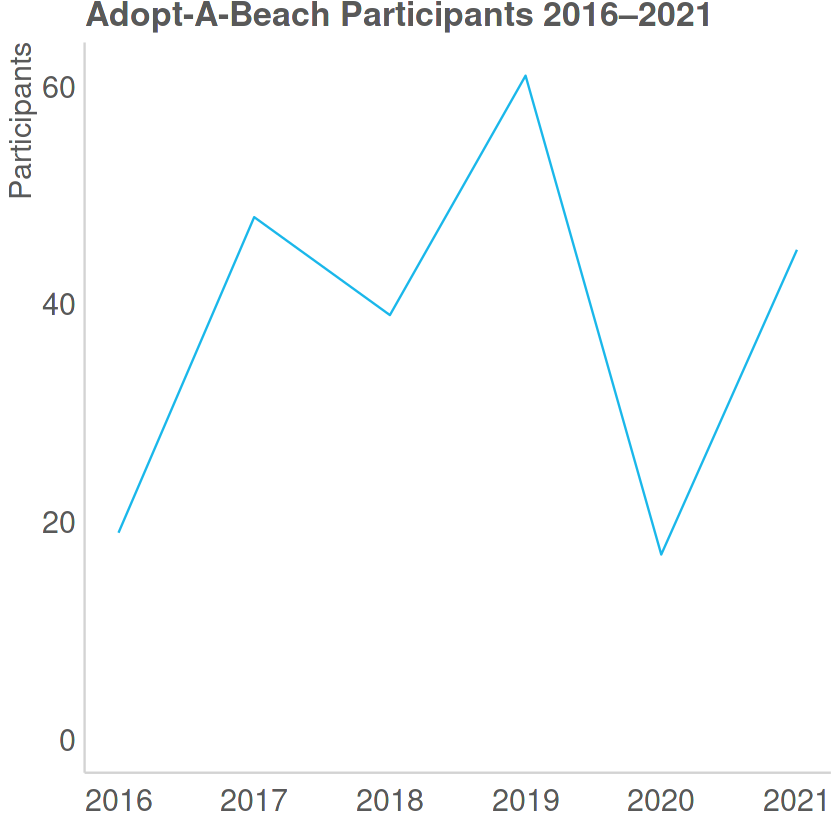

In [6]:
beachCleanups %>% 
  group_by(year = year(date)) %>% 
  summarize(total_users = n_distinct(organization)) %>% 
  ggplot() +
  geom_line(aes(year, total_users), color = '#1ab7ea') +
  expand_limits(y = 0) +
  labs(title = 'Adopt-A-Beach Participants 2016–2021',
       x = NULL,
       y = 'Participants'
       ) +
  theme_dc()

It looks like the number participants has been pretty variable from 2016 to 2021. **The number of participants was at an all-time high in 2019** before **dropping to its lowest ever in 2020**. I would imagine this was due to the covid-19 pandemic. It's important to note that most of the public beaches along the South Carolina coast were closed during the spring and summer of 2020 and have since reopened. There is some good news from the visualization: **the number of participants has risen 164% from 2020 to 2021** (and as of writing this it is only October 10, 2021 and the last data entry is from October 2, 2021), so there is an indication that participation will be back on the rise as beaches have reopened and recreation has resumed along the coast. 

One important thing to note for this dataset is that **there is no information on how many individuals make up each group**, so we cannot truly know how many individual persons (in both groups and as individuals) participated in the program nor can we complete any analysis on the individual/per-person level. This is an unfortunate limitation as it prevents calculation of things such as the average number of items picked up per person or average items picked up per person per hour - a metric that could be used to gauge the litter levels on various beaches. This information needs should be shared with the program managers and MyCoast app creators, to see if this data can be made available or if changes can be made to the app so this data is recorded for future use.

## Cleanups

I'm not only interested in the number of participants, I also want to see how often they are participating. So next I will take a look at the total number of beach cleanups from 2016 to 2021.


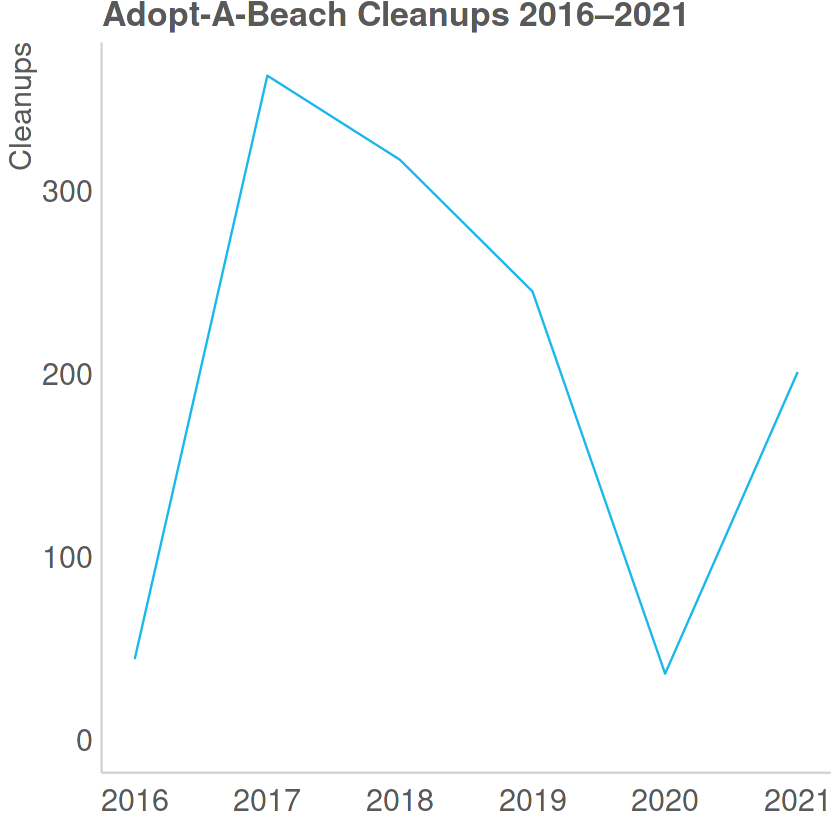

In [7]:
beachCleanups %>% 
  group_by(year = year(date)) %>% 
  summarize(total_cleanups = n()) %>% 
  ggplot() +
  geom_line(aes(year, total_cleanups), color = '#1ab7ea') +
  expand_limits(y = 0) +
  labs(title = 'Adopt-A-Beach Cleanups 2016–2021',
       x = NULL,
       y = 'Cleanups'
  ) +
  theme_dc()


**Cleanups are experiencing more of a downward trend overall**, with the same 2020 plunge seen in the participation visualization. Once again, the good news for 2021 is that the number of cleanups is rising (by 82%) , but it still is not back up to pre-2020 levels. It is very interesting to see that **while the number of participants was at all-time high in 2019, the number of cleanups was at a near all-time low**. I would like to investigate this further. But first, I want to take a quick look at the monthly trends for cleanups, to see if there's any chance of cleanups returning to pre-2020 levels this year.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



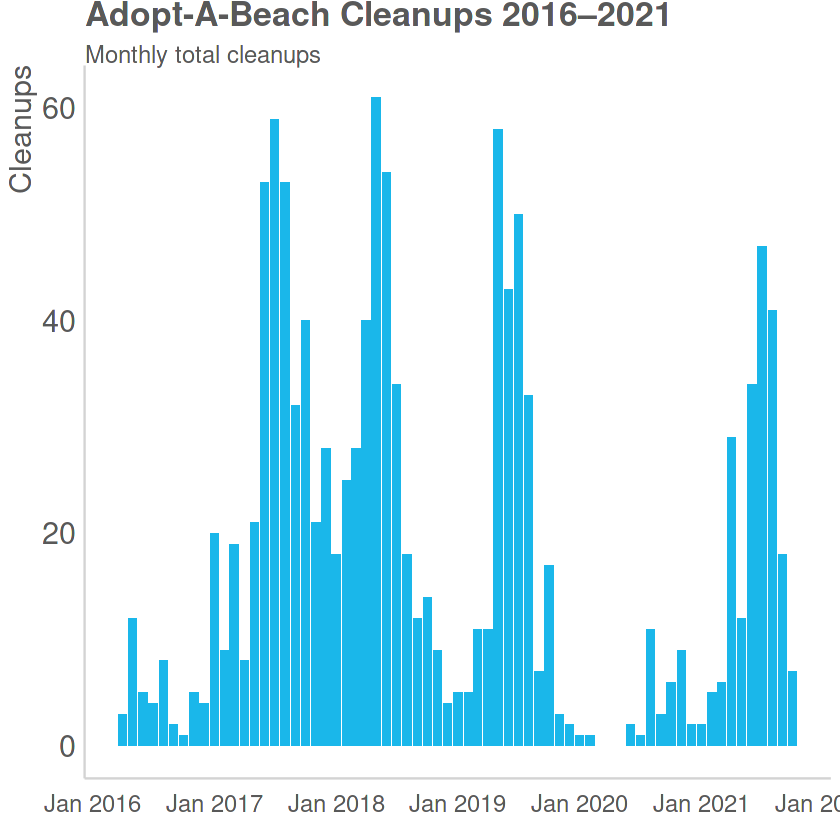

In [8]:
beachCleanups %>% 
  group_by(year = year(date), 
           month = month(date, label = TRUE, abbr = TRUE)) %>% 
  summarize(cleanups = n()) %>% 
  mutate(month_year = my(paste(month, year))) %>% 
  ggplot(aes(month_year, cleanups)) +
  geom_col(fill = '#1ab7ea') +
  scale_x_date(date_breaks = '1 year',
               date_labels = '%b %Y'
  ) +
  labs(title = 'Adopt-A-Beach Cleanups 2016–2021',
       subtitle = 'Monthly total cleanups',
       x = NULL,
       y = 'Cleanups'
  ) +
  theme_dc() + 
  theme(axis.text.x = element_text(size=14))

There's pretty distinct peaks in the middle of the year, which makes sense because these are the warmer summer months and a very popular time for using the beaches in South Carolina. I might also hypothesize that the beaches are most in need of cleanup this time of year, as South Carolina sees the [majority of its tourists in the summer months](https://rfa.sc.gov/sites/default/files/2021-09/SC%20PRT%20Sep%2023%2021%20BEA%20Pres.pdf). Again I can see that there was no cleanup activity in the spring of 2020 because, as previously mentioned, the beaches were closed during this time. Based on this visualization I wouldn't expect much more growth in the number of cleanups for the rest of this year, as they trend downward in the fall and winter months, presumably due to cooler weather. I will make a note to investigate correlations between weather patterns and cleanups in future analysis, but for now, knowing that **the summer months see the most cleanup activity** will be important to share with stakeholders and can provide valuable insight for marketing and promotion of the Adopt-A-Beach program.

Now I'd like to return to the interesting pattern we saw in participants vs cleanups in 2019. I want to look into the number of items picked up over this same time frame, 2016 to 2021.

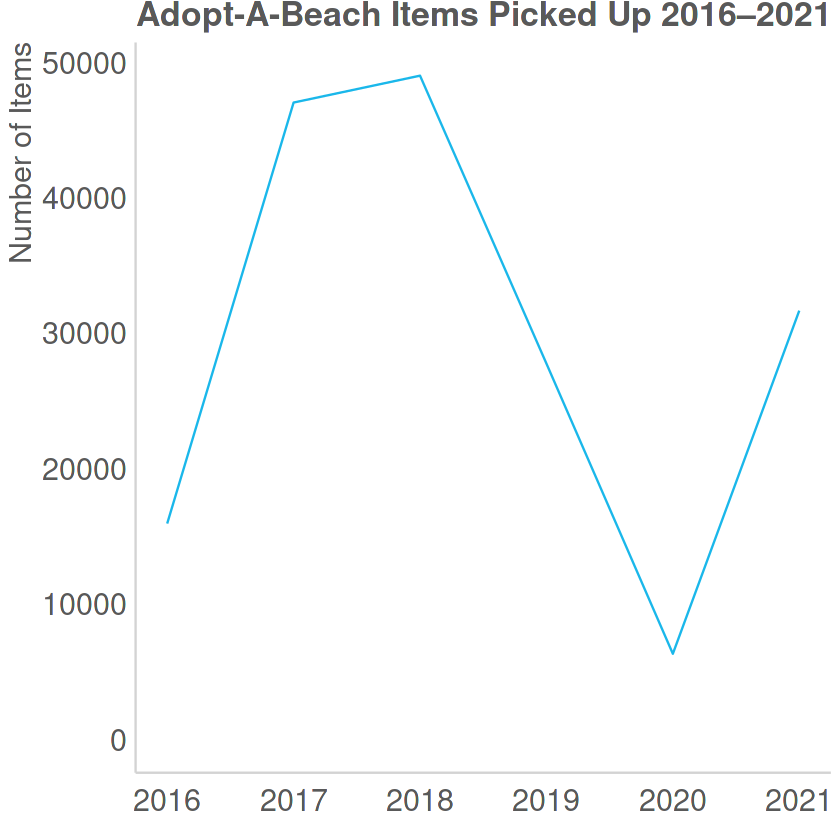

In [9]:
beachCleanups %>% 
  group_by(year = year(date)) %>% 
  summarize(total_items = sum(items)) %>% 
  ggplot() +
  geom_line(aes(year, total_items), color = '#1ab7ea') +
  expand_limits(y = 0) +
  labs(title = 'Adopt-A-Beach Items Picked Up 2016–2021',
       x = NULL,
       y = 'Number of Items'
  ) +
  theme_dc()

Based on the record-high number of participants in 2019, I would expect to also see a higher number of items picked up as well but that is not reflected in this graph. Perhaps the beaches were cleaner that year due to the nearly 50,000 items removed in the previous year 2018, or maybe something else is going on. To investigate a little further, I want to take a look at how many cleanups each participant is completing. According to the [Terms and Conditions](https://mycoast.org/sc/beach-cleanup/terms-and-conditions) of the program, each participant is expected to do two cleanups each year.

`summarise()` has grouped output by 'organization'. You can override using the `.groups` argument.



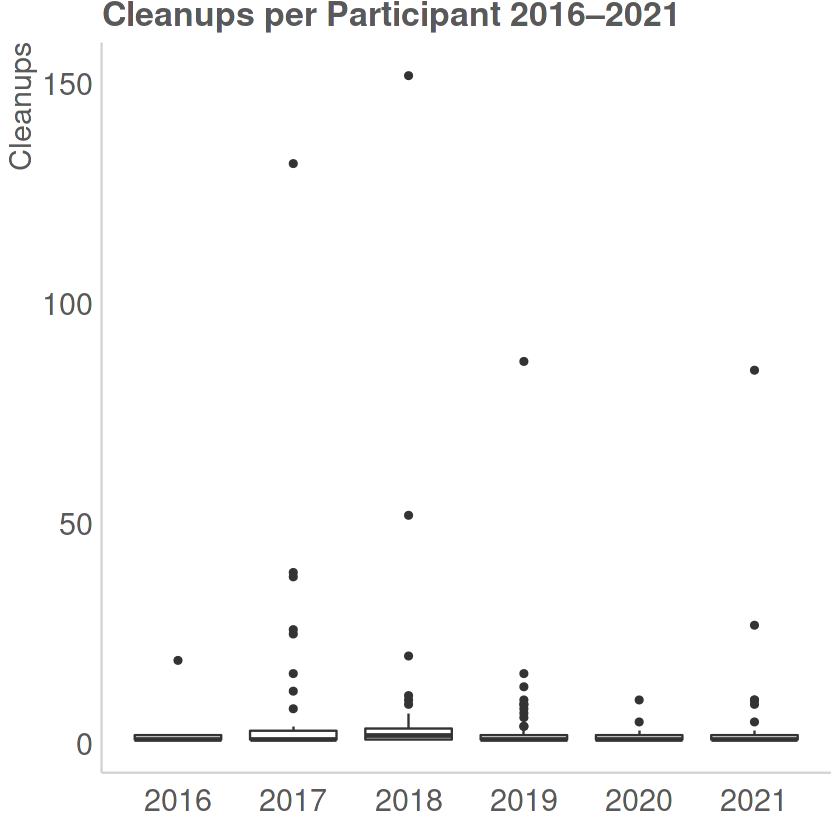

In [10]:
beachCleanups %>% 
  group_by(organization, year = year(date)) %>% 
  summarize(cleanups = n()) %>% 
  ggplot() + 
  geom_boxplot(aes(year, cleanups, group = year)) +
  labs(title = 'Cleanups per Participant 2016–2021',
       x = NULL,
       y = 'Cleanups'
  ) +
  theme_dc() +
  scale_x_continuous(breaks = 2016:2021)

So there's some glaring outliers here (a few participants doing many more cleanups than the majority!), so let's zoom in and see if we can get a better sense of what's going on here.

`summarise()` has grouped output by 'organization'. You can override using the `.groups` argument.



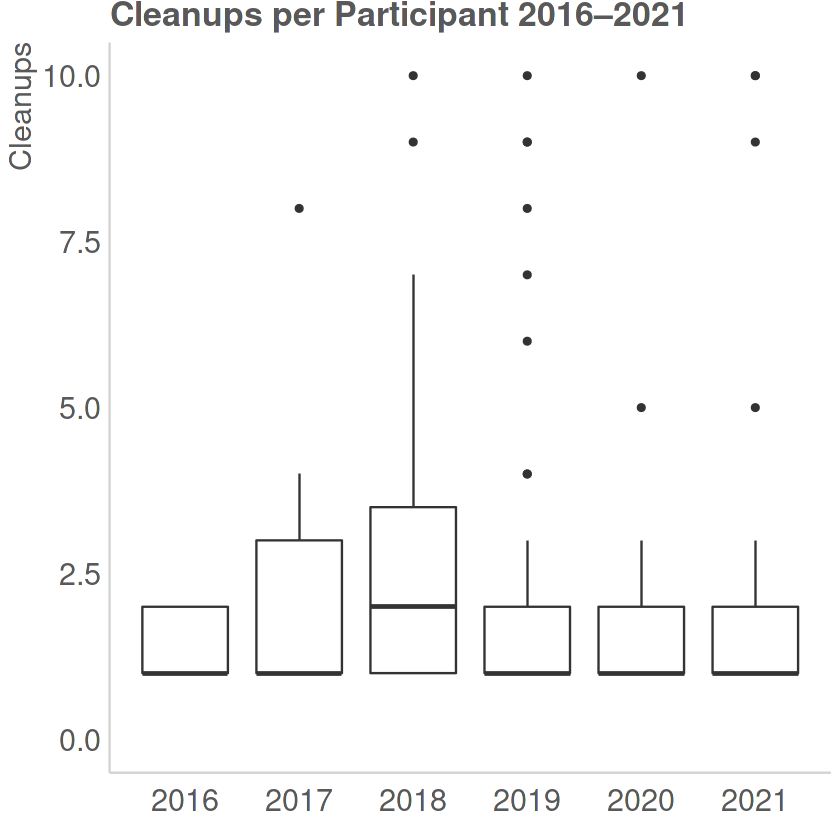

In [11]:
beachCleanups %>% 
  group_by(organization, year = year(date)) %>% 
  summarize(cleanups = n()) %>% 
  ggplot() + 
  geom_boxplot(aes(year, cleanups, group = year)) +
  labs(title = 'Cleanups per Participant 2016–2021',
       x = NULL,
       y = 'Cleanups'
  ) +
  theme_dc() +
  scale_x_continuous(breaks = 2016:2021) +
  coord_cartesian(ylim = c(0,10))

Now it's more apparent that **the majority of participants are doing just one cleanup**. Let's see exactly how many. I'm going to create a new `participants` table for this and filter it down to participants who have done less than 2 cleanups.

In [12]:
participants <- beachCleanups %>% 
  group_by(organization) %>% 
  tally(name = "cleanups")

print("Total Participants")
      
nrow(participants) # total number of all participants

print("Total Participants < 2 Cleanups")

participants %>% 
  filter(cleanups < 2) %>%
  nrow() # total number of participants with less than two cleanups

[1] "Total Participants"


[1] 163

[1] "Total Participants < 2 Cleanups"


[1] 84

So 84 out of 164, or **51% of participants are only doing one cleanup ever rather than two per year** as requested by the Adopt-A-Beach program. In other words, they are participating once and then dropping out of the program. There could be many reasons why this is happening. Perhaps the requirements of the program are not clear to the participants or maybe they experience issues with the MyCoast app or perhaps they don't feel that their time and efforts are valued or important. Further investigation is needed to determine a cause for this trend. 

## Groups vs Individuals

For the final part of this analysis I want to look at trends in participation types. There are two types of participants: `group` and `individual`. First, let's look at the number of each type of participant.

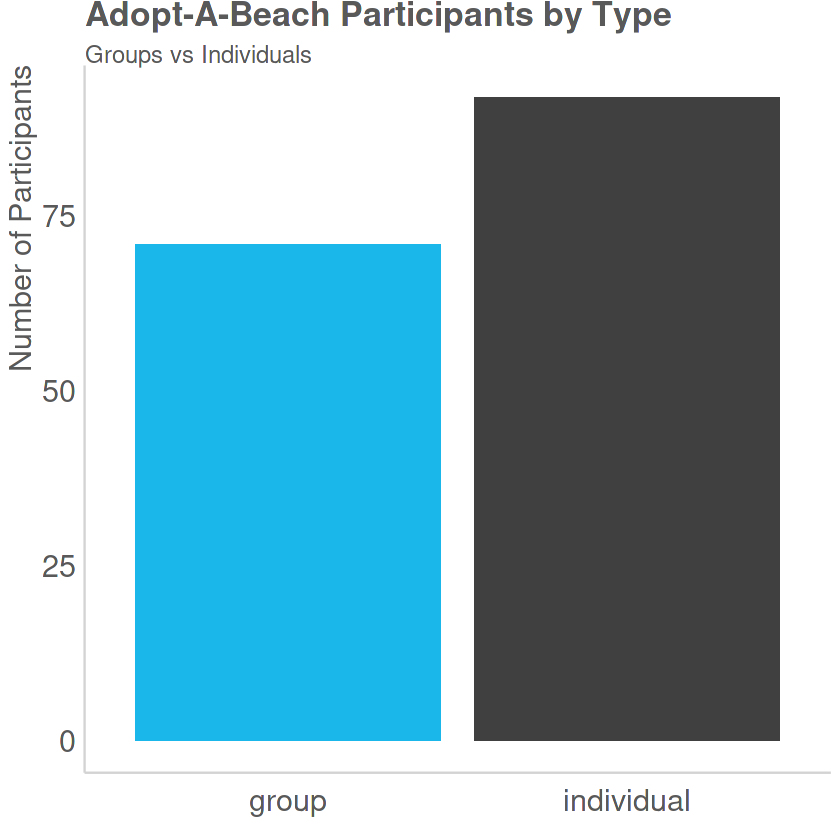

In [13]:
beachCleanups %>% 
  group_by(type) %>% 
  summarize(total = n_distinct(organization)) %>% 
  ggplot() + 
  geom_col(aes(type, total, fill = type), show.legend = FALSE) +
  labs(title = 'Adopt-A-Beach Participants by Type',
       subtitle = 'Groups vs Individuals',
       x = NULL,
       y = 'Number of Participants'
  ) +
  theme_dc() +
  scale_fill_manual(values = c('#1ab7ea',
                             '#404040'))
  

Overall, there have been more individual participants than groups. Let's look at how many cleanups each type has done and then how many items each type has picked up and logged.

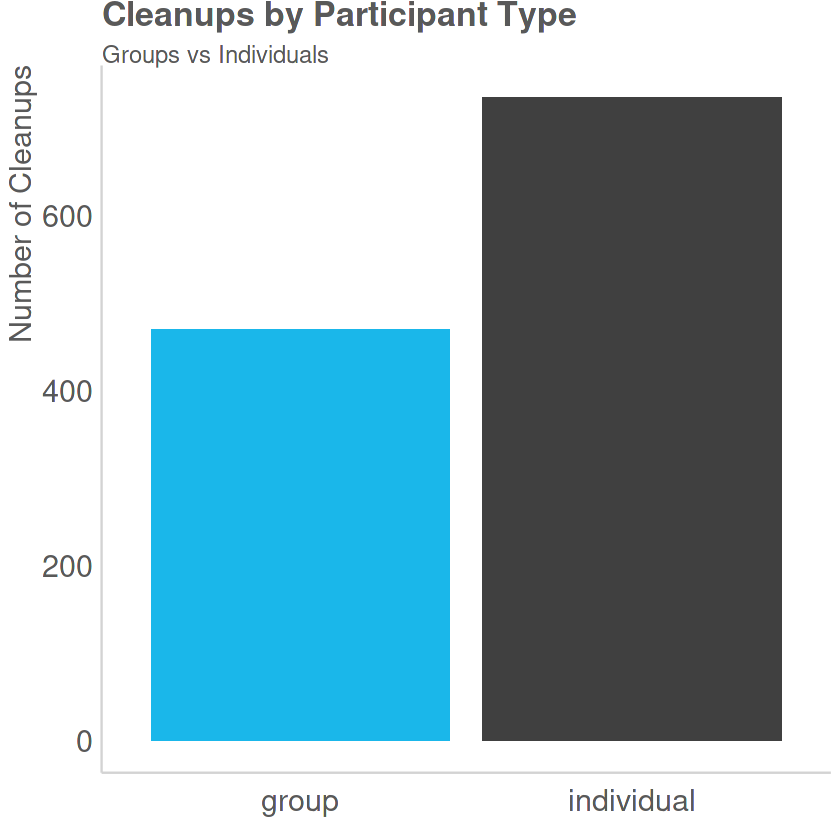

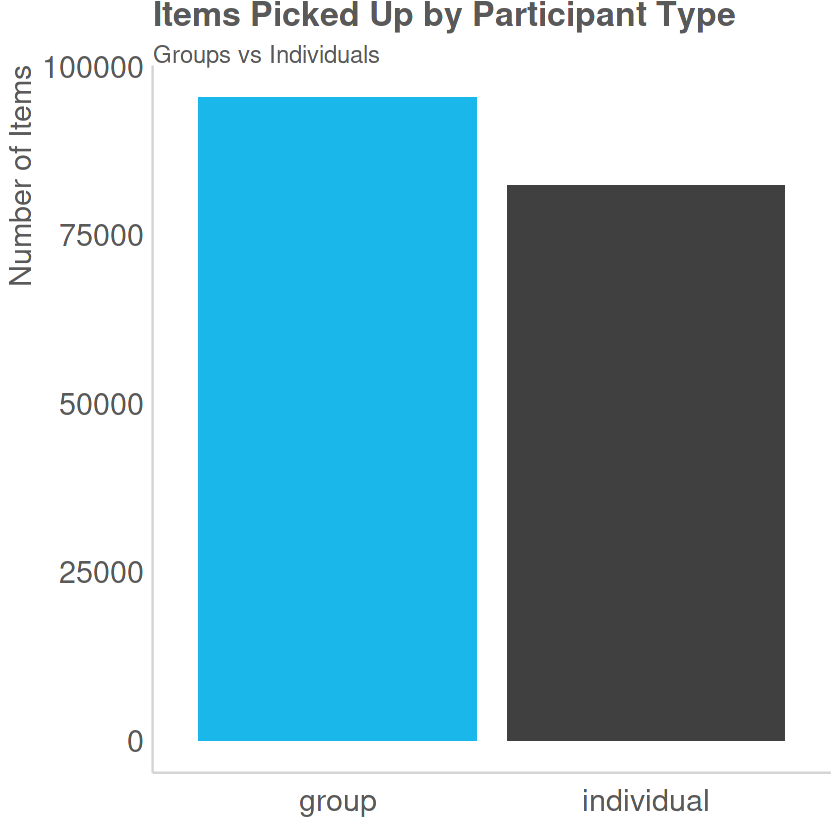

In [14]:
# Cleanups
beachCleanups %>% 
  group_by(type) %>% 
  summarize(total = n()) %>% 
  ggplot() + 
  geom_col(aes(type, total, fill = type), show.legend = FALSE) +
  labs(title = 'Cleanups by Participant Type',
       subtitle = 'Groups vs Individuals',
       x = NULL,
       y = 'Number of Cleanups'
  ) +
  theme_dc() +
  scale_fill_manual(values = c('#1ab7ea',
                             '#404040'))

# Items
beachCleanups %>% 
  group_by(type) %>% 
  summarize(total_items = sum(items)) %>% 
  ggplot() + 
  geom_col(aes(type, total_items, fill = type), show.legend = FALSE) +
  labs(title = 'Items Picked Up by Participant Type',
       subtitle = 'Groups vs Individuals',
       x = NULL,
       y = 'Number of Items'
  ) +
  theme_dc() +
  scale_fill_manual(values = c('#1ab7ea',
                             '#404040'))


**Group participants pick up a little over 15% more items overall, even though they hold 56.5% less cleanups than individual participants.** This makes sense because groups have more than one person cleaning, although as stated previously, there is no information on exactly how many persons make up each group. This is unfortunate because it would be interesting to see the number of items picked up per person in each participant type, to see if there's any correlation between the size of a group and number of items picked up (i.e. Is picking up as a group more efficient/productive than picking up as an individual?). Still, this information is important to note as it seems that groups overall are having more of an impact than individuals and the Adopt-A-Beach program managers might be interested in encouraging and boosting their participation.

Lastly, I want to look at how group and individual participation has trended over the years.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



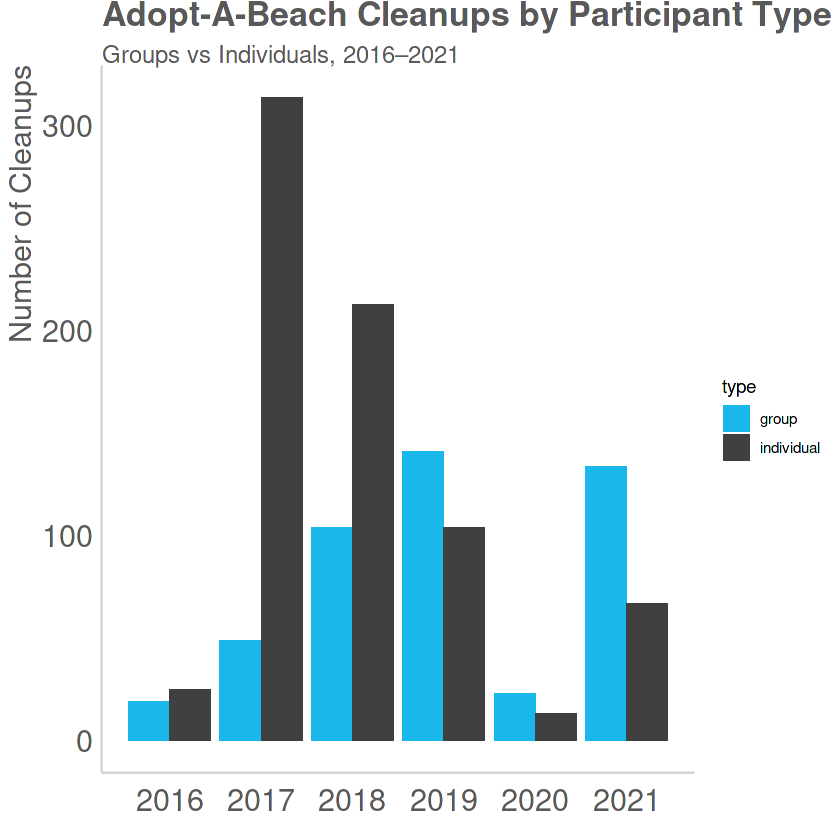

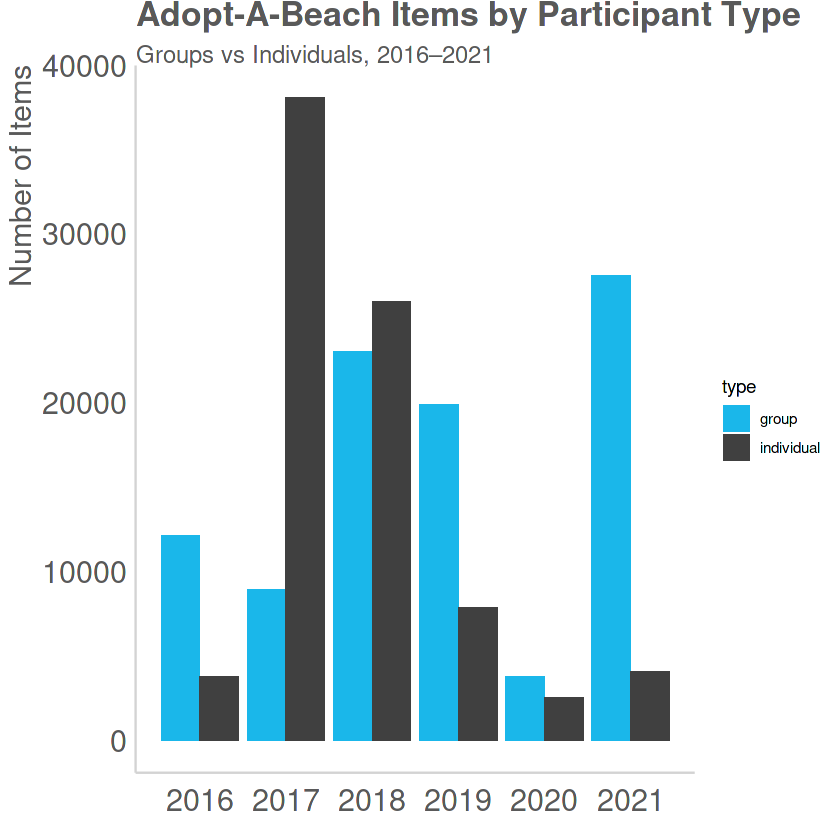

In [15]:
# Cleanups

beachCleanups %>%
  group_by(year = year(date), type) %>% 
  summarize(total_cleanups = n()) %>%
  ggplot() +
  geom_col(aes(year, total_cleanups, fill = type), position = 'dodge') +
  labs(title = 'Adopt-A-Beach Cleanups by Participant Type',
       subtitle = 'Groups vs Individuals, 2016–2021',
       x = NULL,
       y = 'Number of Cleanups'
  ) +
  scale_x_continuous(breaks = 2016:2021) +
  theme_dc() +
  scale_fill_manual(values = c('#1ab7ea',
                             '#404040'))

# Items
beachCleanups %>%
  group_by(year = year(date), type) %>% 
  summarize(total_items = sum(items)) %>%
  ggplot() +
  geom_col(aes(year, total_items, fill = type), position = 'dodge') +
  labs(title = 'Adopt-A-Beach Items by Participant Type',
       subtitle = 'Groups vs Individuals, 2016–2021',
       x = NULL,
       y = 'Number of Items'
  ) +
  scale_x_continuous(breaks = 2016:2021) +
  theme_dc() +
  scale_fill_manual(values = c('#1ab7ea',
                             '#404040'))

It's interesting to see that **group cleanups and items picked up have increased over the years while individual cleanups and items picked up has decreased**. I was surprised to see greater numbers of group activity in 2020 and 2021 during the covid-19 pandemic. Due to social distancing I had expected to see lower group activity. Perhaps since cleanups take place outside, participants feel that beach cleanups are a safe group actvity? Further investigation is needed, however, this information will be important to share with program managers.

# Summary and Recommendations

- Overall, participation in the Adopt-A-Beach program has fallen. **While the number of participants was growing up until the 2020 covid-19 pandemic, the number of cleanups has steadily declined (down 45% from 2017)**. **The majority of participants are only ever completing one cleanup, rather than the two per year requested by the program**. A survey of participants is recommended to collect more data on their experience with the program and app and to provide insight as to why the program abandonment rate is so high.

- Seasonal trends show that **more cleanups are completed in the summer months**, presumably due to the warmer weather that time of year. This seasonality can be leveraged when making decisions around the marketing and promotion of the Adopt-A-Beach program.

- Participation trends show that **group participation is on the rise and that groups pick up more items than individuals**. While more investigation is needed (perhaps to be included in the recommended survey), it does seem that groups are having more of an impact than individuals and the Adopt-A-Beach program might be interested in encouraging and boosting their participation.

- Again, a survey and more data is needed to troubleshoot how to retain participants and help them stay engaged in the program. User experience with the MyCoast app is an important area to investigate further, as the logging of each individual item picked up might be too tedious for most participants. Program information and education is another area to explore, to be sure that participants understand the expectations of the program, as well as the value of their work and participation.

- Lastly, **the data currently lacks the number of persons that make up each group**. This significantly limits the scope of the analysis to the per-cleanup level. It is not possible at this time to calculate how many individual persons (in both groups and as individuals) participated in the program. In addition, valuable metrics, such as the average items picked up per person per hour, cannot be calculated. The data would serve SCDHEC and the public better if group size were included. This information should be shared with the program managers and MyCoast app development team, to see if this data can be made available or if changes can be made to the app so this data is recorded for future use.
